In [5]:
import numpy as np
import matplotlib.pyplot as plt

from thermohl.solver.enums.variable_type import VariableType
from thermohl.solver.enums.solver_type import SolverType
from thermohl.solver.enums.heat_equation_type import HeatEquationType
from thermohl.solver.enums.power_type import PowerType

from thermohl import solver

In [6]:
def plot_all_params(dic):
    # using 1t heat equation on all power terms model sets, building solvers and
    # solving steady temperature
    models = [
        SolverType.SOLVER_CIGRE,
        SolverType.SOLVER_IEEE,
        SolverType.SOLVER_OLLA,
        SolverType.SOLVER_RTE,
    ]
    solvers = [
        solver._factory(
            dic, heat_equation=HeatEquationType.WITH_ONE_TEMPERATURE, model=m
        )
        for m in models
    ]
    results = [s.steady_temperature(return_power=True) for s in solvers]

    # plot all
    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
    for i, key in enumerate([VariableType.TRANSIT.value, "ambient_temperature", "wind_speed"]):
        ax[0, i].plot(dic["hour"], dic[key])
        ax[0, i].set_title(f"Input {key}")

    ax[0, 3].set_title("Conductor temperature")
    for i, r in enumerate(results):
        ci = f"C{1 + i}"
        ax[0, 3].plot(t, r[VariableType.TEMPERATURE], c=ci, label=models[i])
        for j, p in enumerate(
            [
                PowerType.JOULE,
                PowerType.SOLAR,
                PowerType.CONVECTION,
                PowerType.RADIATION,
            ]
        ):
            ax[1, j].plot(t, r[p], c=ci, label=models[i])
            ax[1, j].set_title(f"{p} (W/m)")

    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i, j].set_xlabel("Time (hour)")
            ax[i, j].grid(True)
    ax[-1, -1].legend()
    %matplotlib inline

We can modify the values of the dictionnary if we don't want to use the default values.
Missing or None values in the input dictionary are replaced with a default value, available using solver.default_values()

In [7]:
# time array (in hours)
t = np.linspace(0.0, 24, 241)[:-1]

# input dict, with vrying transit, ambient temperature and wind speed
dic = dict(
    latitude=45.2,
    longitude=0.0,
    altitude=543.0,
    azimuth=21.0,
    month=6,
    day=20,
    hour=t,
    transit=np.piecewise(t, [t < 12.0, t >= 12.0], [300.0, 600.0]),
    ambient_temperature=10.0 + 7.5 * (1 + np.sin(np.pi * (t - 7.0) / 12.0)),
    wind_speed=np.piecewise(t, [t <= 6.0, t > 6.0, t > 12.0, t >= 18.0], [1.0, 2.0, 1.0, 3.0]),
    wind_angle=69,
    albedo=0.21,
    turbidity=0.5,
    core_diameter=0.0,
    outer_diameter=3.0e-02,
    core_area=0.0,
    outer_area=5.69e-04,
    roughness_ratio=6.30e-02,
    absorptivity=0.9,
    emissivity=0.8,
    linear_resistance_dc_20c=5.84e-05,
    magnetic_coeff=1.02,
    magnetic_coeff_per_a=0.01,
    temperature_coeff_linear=4.0e-03,
    temperature_coeff_quadratic=8.0e-07,
    linear_resistance_temp_high=6.7744e-05,
    linear_resistance_temp_low=5.84e-05,
    temp_high=60.0,
    temp_low=20.0,
)

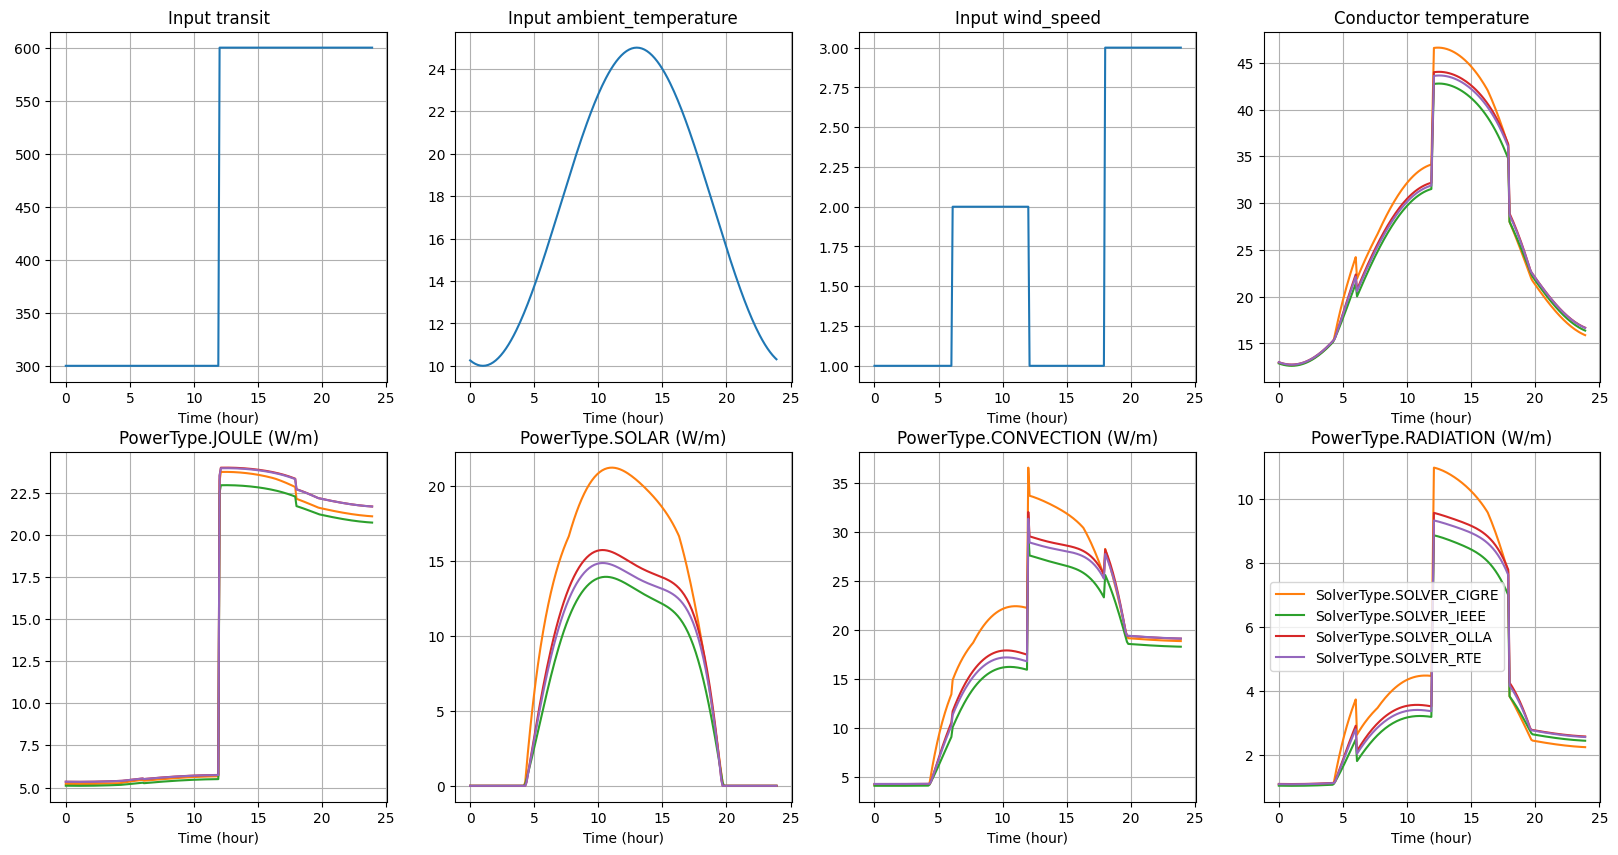

In [8]:
plot_all_params(dic)